In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/archive (1).zip (Unzipped Files)"

covid_19_india.csv  StatewiseTestingDetails.csv


**Source behind the dataset**: https://public.opendatasoft.com/explore/dataset/covid-19-data-catalog/table/?refine.geographical_scope=India

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [5]:
df_statewise_test=pd.read_csv("/content/drive/My Drive/archive (1).zip (Unzipped Files)/StatewiseTestingDetails.csv")
df_statewise_test.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.00000,1210,12.00000
1,2020-04-24,Andaman and Nicobar Islands,2679.00000,NaN,27.00000
2,2020-04-27,Andaman and Nicobar Islands,2848.00000,NaN,33.00000
3,2020-05-01,Andaman and Nicobar Islands,3754.00000,NaN,33.00000
4,2020-05-16,Andaman and Nicobar Islands,6677.00000,NaN,33.00000


In [6]:
df_statewise_test.shape

(6656, 5)



*   The dataset comprises of 6656 entries.




In [7]:
###Checking dataframe

df_statewise_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6656 entries, 0 to 6655
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6656 non-null   object 
 1   State         6656 non-null   object 
 2   TotalSamples  6656 non-null   float64
 3   Negative      3737 non-null   object 
 4   Positive      4661 non-null   float64
dtypes: float64(2), object(3)
memory usage: 260.1+ KB




*   It makes no sense to keep the column "Negative"  as object, as it comprises of numeric values which will help in building insight.
*   Similarly, on the "Date" column processing will become easy after transforming its data type.



In [8]:
###Converting Dtype of Negative column from object to float

df_statewise_test["Negative"]=pd.to_numeric(df_statewise_test["Negative"],errors='coerce')

###Converting Dtype of Date column from object to float

df_statewise_test["Date"]=pd.to_datetime(df_statewise_test["Date"])

df_statewise_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6656 entries, 0 to 6655
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6656 non-null   datetime64[ns]
 1   State         6656 non-null   object        
 2   TotalSamples  6656 non-null   float64       
 3   Negative      3736 non-null   float64       
 4   Positive      4661 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 260.1+ KB


In [9]:
df_statewise_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TotalSamples,6656.00000,955580.37921,1785612.34313,58.00000,32016.75000,178959.00000,971719.75000,14276788.00000
Negative,3736.00000,516296.38142,1004797.81129,0.00000,19117.50000,99597.50000,456044.25000,6884828.00000
Positive,4661.00000,38583.54924,149471.53330,0.00000,327.00000,2526.00000,17807.00000,1638961.00000


In [10]:
df_statewise_test.describe(include='O').transpose()

,count,unique,top,freq
State,6656,35,Kerala,209


In [11]:
###Checking for duplicate

print("Total no of duplicate entries :",df_statewise_test.duplicated().sum(),"\n")
print(df_statewise_test.loc[df_statewise_test.duplicated()==True])
df_statewise_test=df_statewise_test.drop_duplicates()
print("\nTotal no of duplicate entries after removal :",df_statewise_test.duplicated().sum(),"\n")

Total no of duplicate entries : 1 

           Date          State  TotalSamples   Negative  Positive
6046 2020-04-05  Uttar Pradesh    5255.00000 4796.00000 278.00000

Total no of duplicate entries after removal : 0 



In [12]:
###Checking for missing values

df_statewise_test.isna().sum()

Date               0
State              0
TotalSamples       0
Negative        2920
Positive        1995
dtype: int64



*   This implies 43% and 30% of the total data is missing from Negative and positive columns and that many entries cannot be dropped.




In [13]:
###Checking on State column

print("Total no of unique entries :",df_statewise_test["State"].nunique())
print("\nStates where tests were conducted :",df_statewise_test["State"].unique())

Total no of unique entries : 35

States where tests were conducted : ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand'
 'West Bengal']




*   India has 28 states and 8 Union Teritories leading to a sum of 36 but as per the query 35 unique entries were fetched. 
*   We can conclude either a state or a union teritory entry is missing in the available dataset.



In [14]:
###Finding missing state or union teritories


Indian_States=["West Bengal","Uttarakhand","Uttar Pradesh","Tripura","Telangana","Tamil Nadu","Sikkim","Rajasthan","Punjab","Odisha","Nagaland","Mizoram","Meghalaya","Manipur","Maharashtra","Madhya Pradesh","Kerala","Karnataka","Jharkhand","Himachal Pradesh","Haryana","Gujarat","Goa","Chhattisgarh","Bihar","Assam","Arunachal Pradesh","Andhra Pradesh"]
Indian_Union_Territories=["Andaman and Nicobar Islands","Chandigarh","Dadra and Nagar Haveli and Daman and Diu","Delhi","Jammu and Kashmir","Lakshadweep","Puducherry","Ladakh"]

#Which is the missing State or Teritory
entries=df_statewise_test["State"].unique()
i_s,i_t,notin=[],[],[]
for i in entries:
  if i in Indian_States:
    i_s.append(i)
  elif i in Indian_Union_Territories:
    i_t.append(i)
  else:
    notin.append(i)


if(len(i_s)==28 and len(i_t)==8):
  print("All indian states and teritories are covered.")
elif(len(i_s)==28 and len(i_t)<8):
  t=[]
  for i in Indian_Union_Territories:
    if i not in i_t:
      t.append(i)
  print("Indian union teritories whose tests record is missing in this dataset is",t)
elif(len(i_s)<28 and len(i_t)==8):
  s=[]
  for i in Indian_States:
    if i not in i_s:
      s.append(i)
  print("Indian States whose tests record is missing in this dataset is",s)
elif(len(i_s)<28 and len(i_t)<8):
  s,t=[],[]
  for i in Indian_Union_Territories:
    if i not in i_t:
      t.append(i)
  print("Indian union teritories whose tests record is missing in this dataset is",i)
  for i in Indian_States:
    if i not in i_s:
      s.append(i)
  print("Indian States whose tests record is missing in this dataset is",i)
else:
  print("nothing")



Indian union teritories whose tests record is missing in this dataset is ['Lakshadweep']


In [15]:
df_statewise_test.corr()

,TotalSamples,Negative,Positive
TotalSamples,1.00000,0.99687,0.88057
Negative,0.99687,1.00000,0.90671
Positive,0.88057,0.90671,1.00000


*   As per the attained result we can conclude that there is a high correlation between the total sample,positive and negative.




In [16]:
###Analyzing data for inconsistency betwwen TotalSamples	Negative	Positive

df_statewise_test[(df_statewise_test["Negative"].isna()==False) & (df_statewise_test["Positive"].isna()==False)].head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.00000,1210.00000,12.00000
166,2020-04-02,Andhra Pradesh,1800.00000,1175.00000,132.00000
167,2020-04-10,Andhra Pradesh,6374.00000,6009.00000,365.00000
168,2020-04-11,Andhra Pradesh,6958.00000,6577.00000,381.00000
169,2020-04-12,Andhra Pradesh,6958.00000,6553.00000,405.00000


*   Ideally, the result of the test will be either Positive or Negative.       
*   Hence,      TotalSamples = Negative + Positive 
*   On observing few non-null entries from the dataset we can conclude there is an inconsistency in the result.

*   Will create a column named "Validate" to check if recorded data is valid or not.
*   It holds two values Valid or Invalid.






**Fill in the Missing values**

---



---



In [17]:
###missing_rows

missing_rows=df_statewise_test.loc[(df_statewise_test["Negative"].isnull()==True) | (df_statewise_test["Positive"].isnull()==True)]
print("No of rows with missing entries :",len(missing_rows),"\n")
missing_rows.head()

No of rows with missing entries : 3726 



,Date,State,TotalSamples,Negative,Positive
1,2020-04-24,Andaman and Nicobar Islands,2679.00000,nan,27.00000
2,2020-04-27,Andaman and Nicobar Islands,2848.00000,nan,33.00000
3,2020-05-01,Andaman and Nicobar Islands,3754.00000,nan,33.00000
4,2020-05-16,Andaman and Nicobar Islands,6677.00000,nan,33.00000
5,2020-05-19,Andaman and Nicobar Islands,6965.00000,nan,33.00000




*   Case1 : Replace missing values with constant


In [18]:
#Replacing missing value with 0.0009 as there are some aggreagte function which doesn't inculude NaN and as there are entries with zero also available

df_statewise_test["Negative"]=df_statewise_test["Negative"].replace(to_replace=np.NaN,value=0.0009)
df_statewise_test["Positive"]=df_statewise_test["Positive"].replace(to_replace=np.NaN,value=0.0009)

#Confirming
df_statewise_test.isna().sum()

Date            0
State           0
TotalSamples    0
Negative        0
Positive        0
dtype: int64

In [19]:
###Validates the entry
df_statewise_test["Validate"]=df_statewise_test.apply(lambda x: "Valid" if(x["TotalSamples"]==x["Negative"]+x["Positive"]) else "Invalid",axis=1)
df_statewise_test["Validate"].value_counts()

Invalid    5810
Valid       845
Name: Validate, dtype: int64




*   As per the attained result only 845 out of the total entries are valid i.e 87% of the data is invalid if replaced with constant.






*   Case2 : Replace missing value with their difference

In [20]:
df_statewise_test['Negative'].loc[df_statewise_test['Negative']==0.0009] = df_statewise_test.loc[df_statewise_test['Negative']==0.0009]["TotalSamples"]-df_statewise_test.loc[df_statewise_test['Negative']==0.0009]["Positive"]
df_statewise_test['Positive'].loc[df_statewise_test['Positive']==0.0009] = df_statewise_test.loc[df_statewise_test['Positive']==0.0009]["TotalSamples"]-df_statewise_test.loc[df_statewise_test['Positive']==0.0009]['Negative']
df_statewise_test.drop("Validate",axis=1,inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [21]:
###Validates the entry
df_statewise_test["Validate"]=df_statewise_test.apply(lambda x: "Valid" if(x["TotalSamples"]==x["Negative"]+x["Positive"]) else "Invalid",axis=1)
df_statewise_test["Validate"].value_counts()

Valid      4571
Invalid    2084
Name: Validate, dtype: int64

*   We can conclude filling the data with the difference is a better choice as it validates 69% of the data. 
*   It also states that 31% of the total entries are invalid from the beginning.

*   **Analyzing State wise**

---






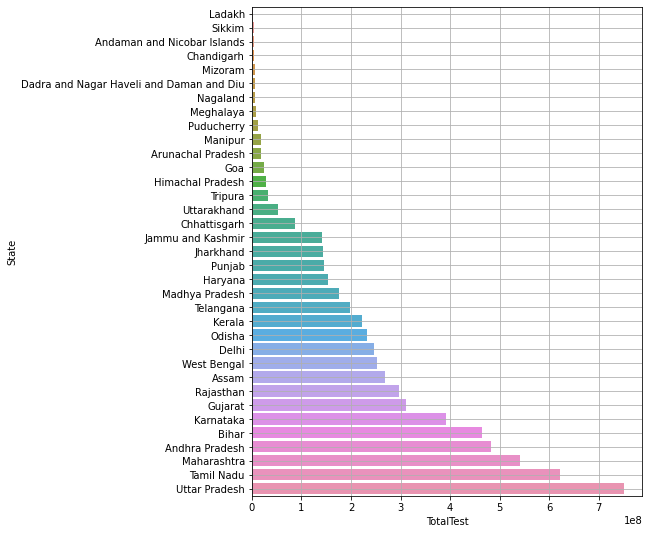

In [22]:
#Statewise total test conducted

df_state=pd.DataFrame(df_statewise_test.groupby("State")["TotalSamples"].sum()).rename(columns={"TotalSamples":"TotalTest"})

plt.figure(figsize=(7,9))
sns.barplot(data=df_state.reset_index().sort_values("TotalTest"),y="State",x="TotalTest")
plt.grid(True)

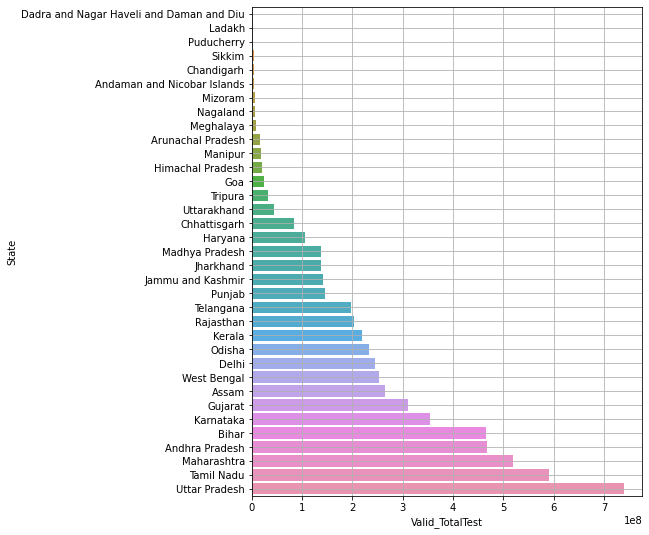

In [23]:
#Statewise total test conducted whose entries are considered valid

valid_df_state=pd.DataFrame(df_statewise_test.loc[df_statewise_test["Validate"]=="Valid"].groupby("State")["TotalSamples"].sum()).rename(columns={"TotalSamples":"Valid_TotalTest"})

plt.figure(figsize=(7,9))
sns.barplot(data=valid_df_state.reset_index().sort_values("Valid_TotalTest"),y="State",x="Valid_TotalTest")
plt.grid(True)

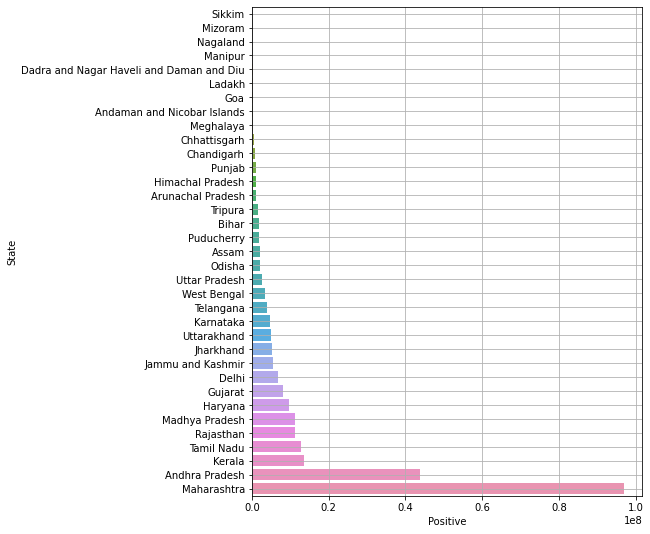

In [24]:
#Statewise positive cases 

df_pos=pd.DataFrame(df_statewise_test.groupby("State")["Positive"].sum())

plt.figure(figsize=(7,9))
sns.barplot(data=df_pos.reset_index().sort_values("Positive"),y="State",x="Positive")
plt.grid(True)

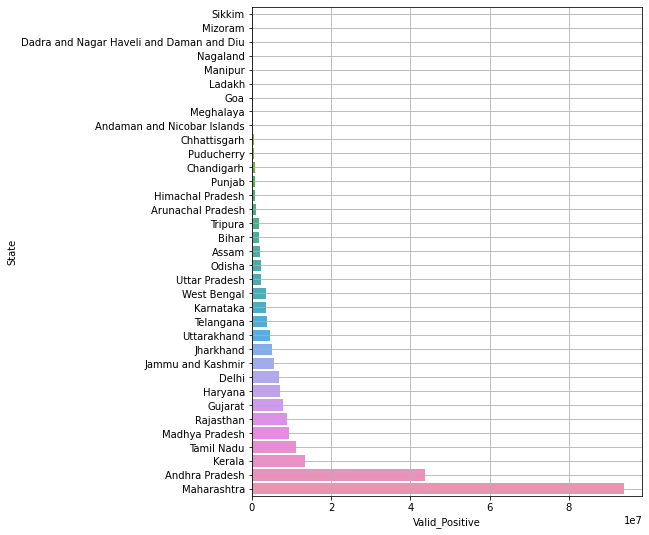

In [25]:
#Statewise positive cases whose entries are considered valid

valid_df_pos=pd.DataFrame(df_statewise_test.loc[df_statewise_test["Validate"]=="Valid"].groupby("State")["Positive"].sum()).rename(columns={"Positive":"Valid_Positive"})

plt.figure(figsize=(7,9))
sns.barplot(data=valid_df_pos.reset_index().sort_values("Valid_Positive"),y="State",x="Valid_Positive")
plt.grid(True)

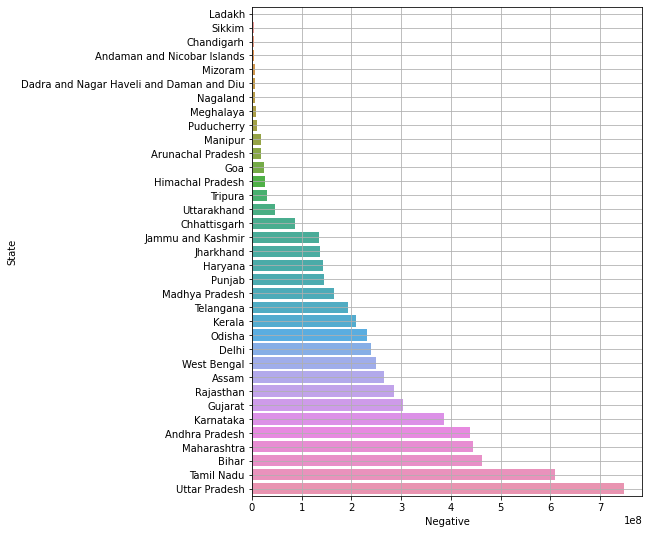

In [26]:
#Statewise negative cases 

df_neg=pd.DataFrame(df_statewise_test.groupby("State")["Negative"].sum())

plt.figure(figsize=(7,9))
sns.barplot(data=df_neg.reset_index().sort_values("Negative"),y="State",x="Negative")
plt.grid(True)


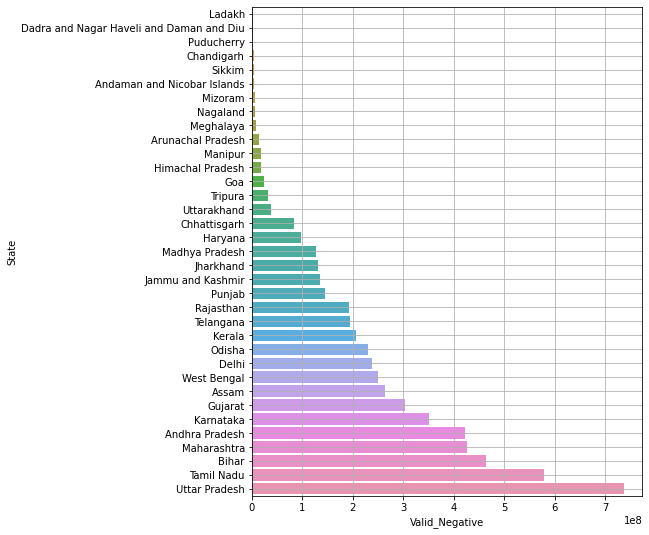

In [27]:
#Statewise negative cases whose entries are considered valid

valid_df_neg=pd.DataFrame(df_statewise_test.loc[df_statewise_test["Validate"]=="Valid"].groupby("State")["Negative"].sum()).rename(columns={"Negative":"Valid_Negative"})


plt.figure(figsize=(7,9))
sns.barplot(data=valid_df_neg.reset_index().sort_values("Valid_Negative"),y="State",x="Valid_Negative")
plt.grid(True)


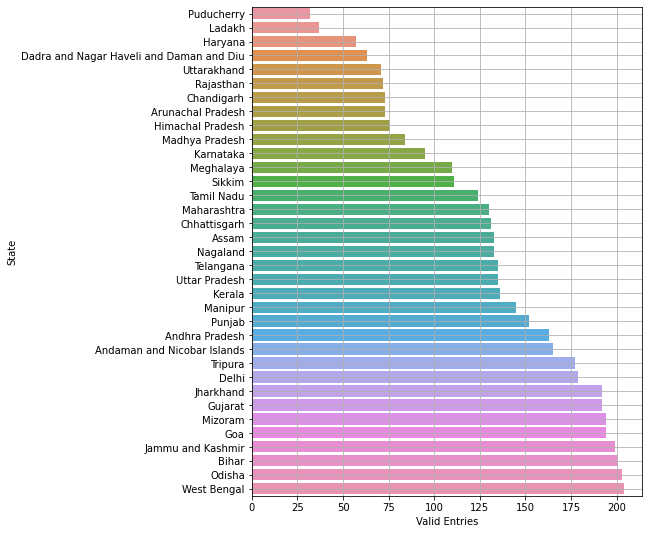

In [28]:
#Statewise valid entries

df_valid=pd.DataFrame(df_statewise_test.loc[df_statewise_test["Validate"]=="Valid"].groupby("State")["Validate"].count()).rename(columns={"Validate":"Valid Entries"})

plt.figure(figsize=(7,9))
sns.barplot(data=df_valid.reset_index().sort_values("Valid Entries"),y="State",x="Valid Entries")
plt.grid(True)

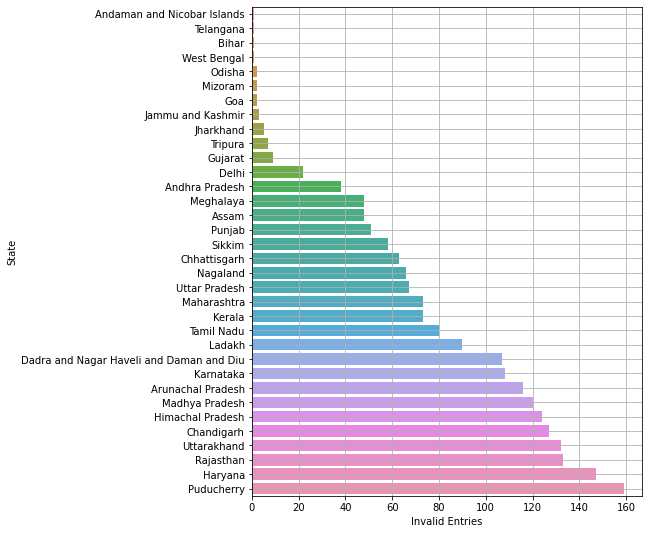

In [29]:
#Statewise invalid entries

df_invalid=pd.DataFrame(df_statewise_test.loc[df_statewise_test["Validate"]=="Invalid"].groupby("State")["Validate"].count()).rename(columns={"Validate":"Invalid Entries"})

plt.figure(figsize=(7,9))
sns.barplot(data=df_invalid.reset_index().sort_values("Invalid Entries"),y="State",x="Invalid Entries")
plt.grid(True)


In [50]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)
new_statewise_df=df_state.merge(valid_df_state,on="State").merge(df_neg, on="State").merge(valid_df_neg, on="State").merge(df_pos,on="State").merge(valid_df_pos,on="State").merge(df_valid,on="State").merge(df_invalid,on="State")
new_statewise_df.insert(2, "Diff_TotalTest", new_statewise_df["TotalTest"]-new_statewise_df["Valid_TotalTest"])
new_statewise_df.insert(5, "Diff_Negative", new_statewise_df["Negative"]-new_statewise_df["Valid_Negative"])
new_statewise_df.insert(8, "Diff_Positive", new_statewise_df["Positive"]-new_statewise_df["Valid_Positive"])
new_statewise_df=new_statewise_df.reset_index()
new_statewise_df.head()

,State,TotalTest,Valid_TotalTest,Diff_TotalTest,Negative,Valid_Negative,Diff_Negative,Positive,Valid_Positive,Diff_Positive,Valid Entries,Invalid Entries
0,Andaman and Nicobar Islands,5233102.00,5231699.00,1403.00,4949213.00,4948003.00,1210.00,283708.00,283696.00,12.00,165,1
1,Andhra Pradesh,481591171.00,466671573.00,14919598.00,437730420.99,422976238.99,14754182.00,43836350.01,43695334.01,141016.00,163,38
2,Arunachal Pradesh,19149999.00,15932684.00,3217315.00,17848420.00,14843866.00,3004554.00,1140063.00,1088818.00,51245.00,73,116
3,Assam,267750078.00,265407427.00,2342651.00,265531926.94,263368816.94,2163110.00,2065991.06,2038610.06,27381.00,133,48
4,Bihar,464810399.00,464807362.00,3037.00,462950347.93,462948048.93,2299.00,1859345.07,1859313.07,32.00,201,1


In [55]:
#Top 5 states where maximum tests were conducted as per this datatset.

new_statewise_df.sort_values("Valid_TotalTest",ascending=False)["State"].head()

31     Uttar Pradesh
28        Tamil Nadu
19       Maharashtra
1     Andhra Pradesh
4              Bihar
Name: State, dtype: object

In [58]:
#Top 5 states where maximum positive tests were reported as per this datatset.

new_statewise_df.sort_values("Valid_Positive",ascending=False)[["State","Valid_Positive"]].head()

,State,Valid_Positive
19,Maharashtra,93877515.01
1,Andhra Pradesh,43695334.01
16,Kerala,13476964.00
28,Tamil Nadu,11143436.06
18,Madhya Pradesh,9493438.00


In [61]:
#Top 5 states where few tests were conducted as per this datatset.

new_statewise_df.sort_values("Valid_TotalTest",ascending=True)["State"].head()

7     Dadra and Nagar Haveli and Daman and Diu
17                                      Ladakh
24                                  Puducherry
27                                      Sikkim
5                                   Chandigarh
Name: State, dtype: object

 **False Negative Cases**

It means people who had Covid19 but were declared negative in test result.

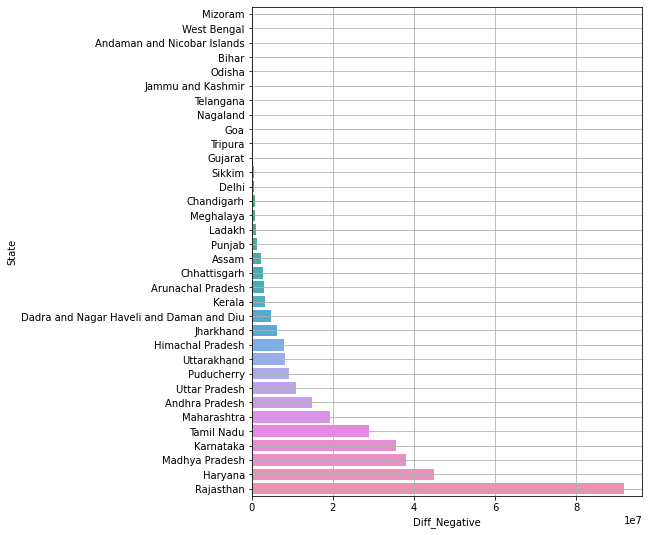

In [65]:
plt.figure(figsize=(7,9))
sns.barplot(data=new_statewise_df.reset_index().sort_values("Diff_Negative"),y="State",x="Diff_Negative")
plt.grid(True)

In [62]:
#Top 5 states where false negative predictions were high as per this datatset.

new_statewise_df.sort_values("Diff_Negative",ascending=False)[["State","Diff_Negative"]].head()

,State,Diff_Negative
26,Rajasthan,91749040.00
11,Haryana,44946610.00
18,Madhya Pradesh,38021007.00
15,Karnataka,35609721.00
28,Tamil Nadu,29017588.00




 **False Positive Cases**





It means people who didn't had Covid19 but were declared positive in test result.

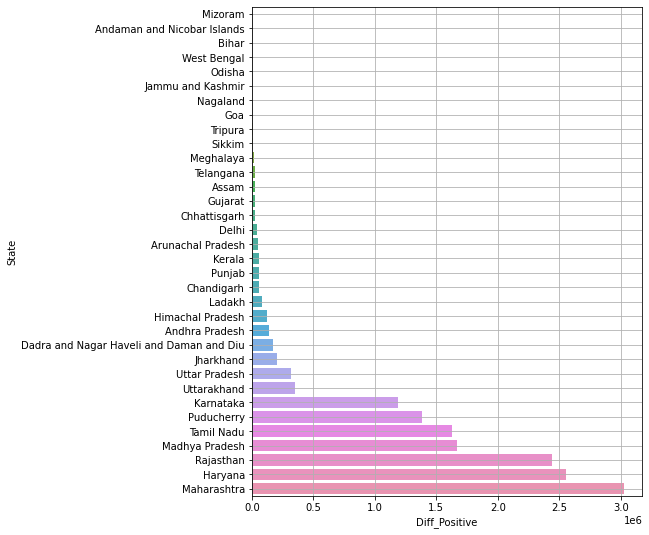

In [64]:
plt.figure(figsize=(7,9))
sns.barplot(data=new_statewise_df.reset_index().sort_values("Diff_Positive"),y="State",x="Diff_Positive")
plt.grid(True)

In [63]:
#Top 5 states where false positive predictions were high as per this datatset.
new_statewise_df.sort_values("Diff_Positive",ascending=False)[["State","Diff_Positive"]].head()

,State,Diff_Positive
19,Maharashtra,3025239.00
11,Haryana,2555016.00
26,Rajasthan,2438626.00
18,Madhya Pradesh,1664623.00
28,Tamil Nadu,1629168.00
